# アイスクリーム統計学 with Python 第5章

第９回講義（2017年10月27日講義、10月31日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>の内容をプログラミング言語 Python に合わせて書き直したものです（著作権者の許諾を得て利用しております）。

<h1 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec0.html" target="_blank">第５章 偏相関</a></h1>

<P class="photo"><img src="image/icecream.jpg" width="172" height="179"></P>
<P>回帰直線をマスターして、ちょっと自信がついたアイ子ちゃん。</P>
<P class="photo"><img src="image/aiko-futsu.jpg" width="168" height="140"></P>
<P class=speech>───最高気温がわかれば、お客の数が予測できるなんて、すごいなー、回帰直線。</P>
<P class=speech>───あれ？　店長、このデータには、最高気温だけじゃなくて、その日の最低気温も載っているじゃないですか。</P>
<P class=speech>「ああ、そうだよ。気象庁の観測データでは、最高気温と最低気温の両方が出ているからね」</P>
<P class=speech>───そうすると、最高気温だけじゃなくて、最低気温のデータも使えば、もっと正確に予測できるんじゃないですか。</P>
<P class=speech>「そうだね。１種類のデータで予測するよりも、２種類のデータで予測したほうが正確かもしれないね」</P>


<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec1.html" target="_blank">5.1　もうひとつの相関</a></h2>

<P class="photo"><img src="image/tencho-futsu.jpg" width="130" height="145"></P>
<P class="speech">「これが最低気温のデータも含めた、全部のデータだよ」</P>
<P class="speech">───よーし、じゃあさっそく、最低気温と客数の相関を求めてみますね。その前にまず散布図を描きます。</P>

__課題5.1__：[去年の夏（最低気温込み）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream3.txt)のデータを用い、次の問いに答えてください。

(1)　最低気温と客数の関係について、相関係数、回帰直線の傾き、回帰直線のy切片を求め、散布図に回帰直線を描き入れてください。

(2)　有意な相関といえるかどうか考察してください。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream3.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'ice_cream3.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'ice_cream3.txt') # Python 3 の場合

('ice_cream3.txt', <http.client.HTTPMessage at 0x104912a90>)

In [3]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = []
col2 = []
col3 = []
col4 = []
for i, line in enumerate(open('ice_cream3.txt')):
    if i == 0:
        continue
    a = line.split()
    col1.append(int(a[0]))
    col2.append(int(a[1]))
    col3.append(int(a[2]))
    col4.append(int(a[3]))

In [4]:
# 平均値を求める関数
def average(list):
    sum = 0
    for x in list:
        sum += x
    return sum / len(list)

In [5]:
# 分散を求める関数
def variance(list):
    ave = average(list)
    sum = 0
    for x in list:
        sum += (x - ave) ** 2
    return sum / len(list)

In [6]:
# 標準偏差を求める関数
import math
def standard_deviation(list):
    return math.sqrt(variance(list))

In [7]:
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）
def covariance(list1, list2): 
    ave1 = average(list1)
    ave2 = average(list2)
    sum = 0
    for d1, d2 in zip(list1, list2):
        sum += (d1 - ave1) * (d2 - ave2)
    return sum / len(list1)

In [8]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1, list2) / (standard_deviation(list1) * standard_deviation(list2))

In [9]:
# 相関係数を求める
correlation(col3, col4)

0.3019115780164577

In [10]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））
def a_fit(xlist, ylist):
    return correlation(xlist, ylist) * standard_deviation(ylist) / standard_deviation(xlist)

In [11]:
# y切片＝yの平均－（傾き＊xの平均）
def b_fit(xlist, ylist):
    return average(ylist) - a_fit(xlist, ylist) * average(xlist)

In [12]:
# 回帰直線の式を表示
a = a_fit(col3, col4)
b = b_fit(col3, col4)
print("y = ax + b; (a, b) = ({0}, {1})".format(a, b))

y = ax + b; (a, b) = (8.100000000000003, 118.59999999999994)


In [13]:
# 回帰直線の式を関数として表現
def f(x):
    return a * x + b

In [14]:
# 回帰直線を描くための準備
test_x = [min(col3) - 1, max(col3) + 1]
fitted_y = [f(test_x[0]), f(test_x[1])]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

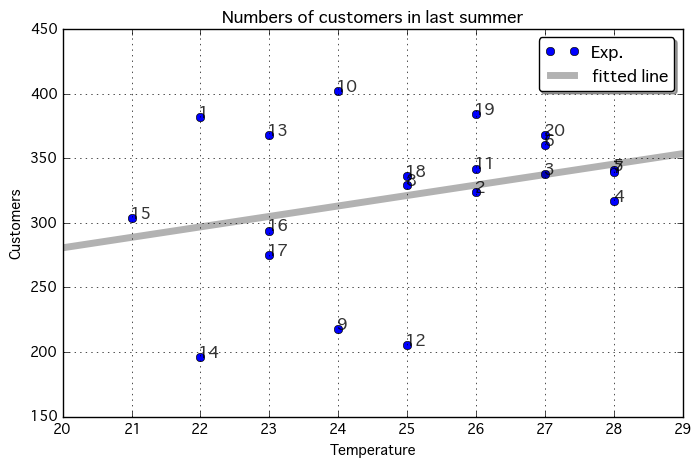

In [16]:
# 散布図と回帰直線を描く。
plt.figure(figsize=(8,5))
plt.plot(col3,col4,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=5, alpha=0.3)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col3, col4):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()

<P class="speech">───ふう、やっと計算が終わった。相関係数は、0.302 だった。これは有意な相関なのかな？　サンプル数が20のときの、5%有意水準の限界値は、0.444だから、0.302だと有意な相関とはいえないわね。</P>
<P class="photo">→<a href="IceCreamStatistics03.ipynb" target="_blank">無相関検定を思い出そう</a>（3章）</P>
<P class="speech">───店長。最低気温と客数の相関係数は、0.302でした。5%水準で有意な相関とはいえませんね。</P>
<P class="photo"><img src="image/tencho-muzukashii.jpg" width="127" height="138"></P>
<P class="speech">「なにー？　じゃあ、最低気温と客数には関係がないということか？　最高気温と客数の相関はあるのに、最低気温にはないというのか？　なんか不公平じゃないか？　最低気温がかわいそうじゃないか。同じデータなのに」</P>
<P class="speech">───店長、かわいそうとか、そういう問題じゃないと思いますけど。</P>
<P class="speech">「いや、私には納得できんぞ」</P>


<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec2.html" target="_blank">5.2　偏相関とは</a></h2>

<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P class="speech">「どうしました？　店長、アイ子ちゃん。かわいそうとか、そうじゃないとか」</P>
<P class="speech">───あ、三ヶ島先輩。この前の、最高気温と客数の相関なんですが、最低気温のデータもあるので、このデータも合わせれば予測がもっと正確になると思ったんですよ。</P>
<P class="speech">「なるほど、それは期待できるね」</P>
<P class="speech">───でも、最低気温と客数の相関は弱くて、0.302なんです。有意な相関ではありませんでした。だから、最低気温は役に立たないデータだと言ったら、店長が、それはかわいそうだ、と言い出して……。</P>
<P class="speech">「ふむふむ。アイ子ちゃん、相関が弱いからといって、予測の役に立たないとは言えないよ。逆に、相関が強いからといって、予測の役に立つとも言い切れないんだ」</P>
<P class="speech">───ええっ？　どうしてですか？</P>
<P class="speech">「特に、今回のように、最高気温、最低気温、客数というように、３つ以上の変数（データの種類）があるときにはね」</P>
<P class="speech">───どういうことなんですか？</P>
<P class="speech">「これを理解するためには＜偏相関＞ということを知らなくてはならない」</P>
<P class="speech">───変相関？　変な相関ですか？</P>
<P class="photo"><img src="image/aiko-ganbaru.jpg" width="181" height="133"></P>
<P class="speech">「また、そういうギャグをとばさないように。じゃ、＜偏相関＞について説明するね」</P>
<P class="speech">───はい。お願いします。</P>

<h4 style="border-bottom: solid 1px black;">偏相関とは？</h4>

<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>今回のデータを整理して、図に表してみよう。こんなふうになるね。数字は相関係数だよ。</p>
<p class="photo"><img src="image/hensokan1.jpg" width="359" height="165"></p>
<p>さて、この図の中でもう一つ相関係数が求められるね。アイ子ちゃん、それは何だろう。</p>
<p class="speech">───はい、最高気温と最低気温の相関係数です。求めてみますね。</p>
<p class="speech">───でました。最高気温と最低気温の相関係数は、0.706です。</p>
<p>よし。それを図の中に書き加えてみよう。こうなるね。</p>
<p class="photo"><img src="image/hensokan2.jpg" width="373" height="169"></p>
<p>１日の最高気温が高ければ、最低気温も高いだろうし、逆に、最高気温が低ければ、最低気温も低くなるだろうね。だから、最高気温と最低気温の相関が、0.706で強いのは自然なことだね。</p>
<p>つまり、客数は最高気温の影響を受けているわけだけれども、最低気温もまた最高気温の影響を受けているわけだ。</p>
<p>そこで、こんなことを考える。客数も最低気温も、最高気温の影響を受けているので、その影響をなくしてみたらどうだろう。こんなイメージだ。</p>
<p class="photo"><img src="image/hensokan3.jpg" width="387" height="205"></p>
<p>ここで、最低気温と客数の相関から最高気温の影響を取り除いたものを「<em>偏相関</em>」と呼ぶんだ。そして、その値を「<em>偏相関係数</em>」という。</p>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec3.html" target="_blank">5.3　偏相関係数を求める</a></h2>

<P class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></P>
<P>偏相関のイメージは、わかったかな？</P>
<P>それでは、偏相関係数の計算に移ろう。</P>
<P>偏相関係数は次のような式で計算できる。ここでは、簡単のために、最高気温、最低気温、客数をそれぞれ、a, b, yという記号で表しているよ。そして、それぞれの間の相関係数は、<font size="+2">r</font>ab, <font size="+2">r</font>ay,<font size="+2">r</font>byとしているよ。</P>
<P class="photo"><img src="image/hensokan6.jpg" width="501" height="351"></P>
<P>それじゃ、実際に計算してみよう。</P>
<P>「*」はかけ算、「/」はわり算、「<em>^2</em>」は２乗、「<em>sqrt</em>」はルート（平方根）だ。</P>
<P>さて、</P>
<P class="eq"><font size="+2">r</font>ab=0.706</P>
<P class="eq"><font size="+2">r</font>ay=0.870</P>
<P class="eq"><font size="+2">r</font>by=0.302</P>
<P>だったから、上の式に当てはめると、</P>
<P>偏相関係数は</P>
<P class="eq">=(0.302-(0.870*0.706))/(sqrt(1-0.870^2)*sqrt(1-0.706^2))</P>
<P class="eq">=-0.894</P>
<P>となる。</P>
<P class="photo"><img src="image/aiko-asekaki.jpg" width="194" height="150"></P>
<P class="speech">───あわわわ。待ってください。すごく長い式なので面食らってます。</P>
<P class="speech">「確かに長いね。カッコも多い。じっくりゆっくり見てね」</P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題5.3</h4>

[去年の夏のデータ（最低気温込み）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream3.txt)のデータを用い、最高気温の影響を取り除いた、最低気温と客数の偏相関係数を求めてください。

* a の影響を除いた、b と y の偏相関係数 = （__r__<sub>by</sub> - (__r__<sub>ay</sub> ＊ __r__<sub>ab</sub>)) / sqrt ((1 - __r__<sub>ay</sub><sup>2</sup>) ＊ (1 - __r__<sub>ab</sub><sup>2</sup>))

In [17]:
# a の影響を除いた、b と y の偏相関係数 partial correlation coefficient を求める関数
def partial_correlation(a, b, y):
    rby = correlation(b, y)
    ray = correlation(a, y)
    rab = correlation(a, b)
    return (rby - ray * rab)  / math.sqrt((1 - ray ** 2) * (1 - rab ** 2))

In [18]:
# 偏相関係数を求める
partial_correlation(col2, col3, col4)

-0.895600384086399

<P class="speech">───はい、大丈夫です。偏相関係数は、-0.894です。え？　マイナス？　偏相関係数がマイナス？</P>
<P class="speech">「そうだ。マイナスになったね。こういうことだ」</P>
<P class="photo"><img src="image/hensokan4.jpg" width="381" height="183"></P>
<P class="speech">───三ヶ島先輩、どういうことですか？　最初の相関係数は、0.302でプラスだったのに、偏相関係数がマイナス0.894になってしまったのは？」</P>
<P class="speech">「よし、説明しよう」</P>

<h4 style="border-bottom: solid 1px black;">偏相関係数の解釈</h4>
<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p class="speech">「すでにいったように偏相関係数は、最高気温の影響を取り除いたときの、最低気温と客数の関係だ。そこで、偏相関係数が-0.894になったということは、もし、最高気温が同じなら、最低気温が低い方が客が多くなるし、最低気温が高いほど客が少なくなる、ということだ」</p>
<p class="speech">───うーん、最高気温が同じなら、最低気温が低い方が客が多い？</p>
<p class="speech">「そうだ」</p>
<p class="speech">───それはどういうことなんでしょうか？</p>
<p class="speech">「ここからは推論になるけどね。たとえば、よく晴れた日は、雲がないために夜に気温が下がって最低気温も低くなるだろう。逆に、雨の日や、雲の多い日は、最高気温も上がらないが、最低気温もそれほど下がらない」</p>
<p class="speech">───ということは？</p>
<p class="speech">「ということは、もし最高気温の影響を取り除くとすると、最低気温が下がった方が晴れていて、その結果、客が増えたのだろう。逆に、最低気温がそれほど下がらなかったときは、雨や曇りの日で、客が少なかったのかも知れないね」</p>
<p class="speech">───なるほど、そう考えると、偏相関係数がマイナスになったことの説明がつきそうです。</p>
<p class="speech">「あくまでも、これは推測した解釈だよ。ただ、偏相関係数がマイナスであるのは事実だ」</p>
<p class="speech">───なんだか、偏相関係数って不思議だわ。</p>
<p class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></p>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec4.html" target="_blank">5.4　もうひとつの偏相関係数</a></h2>

<p class="photo"><img src="image/aiko-suteki.jpg" width="154" height="130"></p>
<p class="speech">───三ヶ島先輩。</p>
<p class="speech">「え？」</p>
<p class="speech">───今求めた偏相関係数は、最高気温の影響を取り除いたものでしたよね。</p>
<p class="speech">「うん、そうだね」</p>
<p class="speech">───ということは、それとは別に、最低気温の影響を取り除いた偏相関係数というのも考えられますね。</p>
<p class="speech">「そうだ。こんな感じだね」</p>
<p class="photo"><img src="image/hensokan5x.jpg" width="396" height="190"></p>
<p class="speech">「じゃあ、この偏相関係数を求めてみて」</p>
<p class="speech">───はい。じゃあ、コーンも手伝って。</p>
<p class="photo"><img src="image/corn.jpg" width="120" height="91"></p>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題5.4</h4>

[去年の夏のデータ（最低気温込み）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream3.txt)のデータを用い、最低気温の影響を取り除いた、最高気温と客数の偏相関係数を求めてください。

In [19]:
# 偏相関係数を求める
partial_correlation(col3, col2, col4)

0.9732414179952071

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap5/sec5.html" target="_blank">5.5　偏相関再び</a></h2>

<P class="photo"><img src="image/tencho-muzukashii.jpg" width="127" height="138"></P>
<P class="speech">「いやぁ、すっきりしたぁ～」</P>
<P class="speech">───あ、店長。ずいぶん長いトイレでしたねー。</P>
<P class="speech">「で、どうなの。最低気温の立場は回復したの？」</P>
<P class="speech">───はい。ばっちりです。最高気温の影響を取り除くと、最低気温と客数の関係はマイナスの偏相関になるんです。</P>
<P class="speech">「なに～？　変相関？　なんかヘン～」</P>
<P class="speech">───（再び、がくっ）いえ、店長。「偏相関」でございます。これを見てください。</P>
<P class="photo"><img src="image/hensokan4.jpg" width="381" height="183"></P>
<P class="speech">───最高気温の影響を取り除いた偏相関係数は、-0.894となります。つまり、最高気温が同じなら、最低気温が低い方が、お客の数が増えるということなんです。</P>
<P class="speech">「おおっ！　なんか不思議だけど、そんな気もするぞ。すごいな偏相関ってのは！」</P>
<P class="photo"><img src="image/tencho-ureshinaki.jpg" width="129" height="144"></P>

<h4 style="border-bottom: solid 1px black;">偏相関をもう一度別の角度から説明しよう</h4>
<p>偏相関は、重要でもあり、なかなかわかりにくい考え方でもあるから、もう一度、ここで別の角度から説明しよう。</p>
<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>まず、最高気温と客数の回帰直線を求めることから出発したね。これだ。</p>
<p class="photo"><img src="image/bunkai1.jpg" width="326" height="221"></p>
<p>これを分解すると、回帰直線で完全に予測できる部分と、それから残った部分（残差）に分解できる。つまり、</p>
<p class="photo"><img src="image/bunkai2.jpg" width="327" height="222"></p>
<p class="photo"><em><font size="+2">回帰直線で完全に予測できる部分：回帰成分（相関=1）</font></em></p>
<p class="photo"><center><em><font size="+5">＋</font></em></center></p>
<p class="photo"><img src="image/bunkai3.jpg" width="326" height="220"></p>
<p class="photo"><em><font size="+2">残りの部分：残差（相関=0）</font></em></p>
<p>もう一度書き直してみると、こんな感じだ。</p>
<p><img src="image/bunkai1.jpg" width=200 height=150 align="middle"><font size="+5"><center><em>＝</em></center></font><img src="image/bunkai2.jpg" width="200" height="150" align="middle"><font size="+5"><center><em>＋</em></center></font><img src="image/bunkai3.jpg" width="200" height="150" align="middle"></p>
<p>もっと簡単に書くと</p>
<p class="eq">最高気温と客数の散布図　＝　回帰成分（相関1）＋残差（相関0）</p>
<p>ということだ。</p>
<p>まったく同じようにして、最高気温と最低気温の関係も次のように分解できる。</p>
<p><img src="image/bunkai4.jpg" width=200 height=150 align="middle"><font size="+5"><center><em>＝</em></center></font><img src="image/bunkai5.jpg" width="200" height="150" align="middle"><font size="+5"><center><em>＋</em></center></font><img src="image/bunkai6.jpg" width="200" height="150" align="middle"></p>
<p>つまり、</p>
<p class="eq">最高気温と最低気温の散布図＝回帰成分（相関1）＋残差（相関0）</p>
<p>となる。</p>
<p>さて、ここからが重要だ。</p>
<p>では、「最高気温の影響を取り除いたときの、最低気温と客数の偏相関係数」とは何か？</p>
<p>これは、上の２つの式の「<em>残差同士の相関</em>」なんだ。</p>
<p>つまり、</p>
<p class="eq"><font color="#666666">最高気温と</font>客数の散布図　＝　<font color="#666666">回帰成分（相関1）</font>＋<font color="#990000">残差（相関0）</font></p>
<p class="eq"><font color="#666666">最高気温と</font>最低気温の散布図＝<font color="#666666">回帰成分（相関1）</font>＋<font color="#990000">残差（相関0）</font></p>
<p>この２つの残差同士の相関、これが偏相関係数というわけだ。</p>
<p>図でいうと、</p>
<p><center><img src="image/bunkai3.jpg" width="200" height="150" align="middle"><font size="+5">と</font><img src="image/bunkai6.jpg" width="200" height="150" align="middle"><font size="+5">の相関</font></center></p>
<p>ということだ。</p>
<p>実際に、残差同士の散布図を描いてみると、次のようになる。</p>
<p class="photo"><img src="image/bunkai7.jpg" width="363" height="274"></p>
<p>確かに右下がりの負の相関になっている。</p>
<p>今まで「最高気温の影響を取り除く」と言ってきたのは、この２つの回帰成分（相関1）を取り除くということに当たる。そうすると、残りは残差だけなので、この残差同士の相関係数を求めて、偏相関係数としたわけだ。</p>
<p>これが、次の図で説明してきた、偏相関係数のもう一つの説明だよ。</p>
<p class="photo"><img src="image/hensokan3.jpg" width="387" height="205"></p>



<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第５章 課題</h2>

__課題5.1__、__課題5.3__、および __課題5.4__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：10月31日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第５章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [20]:
# アイスクリーム統計学 第５章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics06.ipynb">第６章：重回帰</a> に進んでください。</h2>
（2017年10月27日講義、10月31日課題提出締切）